In [1]:
###### Math, Plotting, and Data Frames
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
###### Preprocessing and Hyperparameter tuning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
###### Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# import xgboost as xgb
###### Metrics and Scoring
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('hfi_cc_2018.csv')

print(df.columns)
print(df.shape)
df.describe()

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)
(1458, 123)


,year,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
count,1458.000000,880.000000,880.000000,880.000000,1378.000000,1378.000000,1369.000000,1378.000000,1279.000000,1378.000000,...,1283.000000,1357.000000,1368.000000,1374.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,2012.000000,5.589355,5.474770,5.044070,5.309641,7.412980,8.341855,9.519458,6.772869,9.584972,...,4.886192,7.698494,6.981858,6.317668,7.019782,6.785610,76.973149,6.993444,77.007983,2.490566
std,2.582875,2.080957,1.428494,1.724886,1.529310,2.832947,3.225902,1.744673,2.768983,1.559826,...,1.889168,1.728507,1.979200,1.230988,1.027625,0.883601,44.540142,1.025811,44.506549,1.119698
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.009841,2.483540,2.880000,1.000000,3.765827,1.000000,1.000000
25%,2010.000000,4.133333,4.549550,3.789724,4.131746,6.386978,10.000000,10.000000,5.000000,9.942607,...,3.433786,6.874687,6.368178,5.591851,6.429498,6.250000,38.000000,6.336685,39.000000,1.000000
50%,2012.000000,5.300000,5.300000,4.575189,4.910797,8.638278,10.000000,10.000000,7.500000,10.000000,...,4.418371,8.074161,7.466692,6.265234,7.082075,6.900000,77.000000,6.923840,76.000000,2.000000
75%,2014.000000,7.389499,6.410975,6.400000,6.513178,9.454402,10.000000,10.000000,10.000000,10.000000,...,6.227978,8.991882,8.209310,7.139718,7.720955,7.410000,115.000000,7.894660,115.000000,3.000000
max,2016.000000,9.700000,8.773533,8.719848,8.723094,9.926568,10.000000,10.000000,10.000000,10.000000,...,9.623811,9.999638,9.865488,9.272600,9.439828,9.190000,162.000000,9.126313,162.000000,4.000000


There are 123 features in this dataset. To minimize this, the documentation for the Human Freedom Index shows that most categories are actually sub-categories. So I'll use the main categories, which greatly reduces the features to look through as well as significantly reducing null values. It's safe to say most countries were able to answer broad questions, but not all countries were able to answer more specific questions (sub-category) for some years, or even all reported years.

In [3]:
hfi_df = pd.DataFrame() # creating a empty dataset

hfi_df["year"] = df.year                             # Year of Observation
hfi_df["country"] = df.countries                     # Name of the Country
hfi_df["region"] = df.region                         # Year of Observation

hfi_df["rule_of_law"] = df.pf_rol                    # Rule Of Law
hfi_df["homicide"] = df.pf_ss_homicide               # Homicide
hfi_df["disappearances"] = df.pf_ss_disappearances   # Disappearances, conflict, and terrorism
hfi_df["security_safety"] = df.pf_ss                 # Security and Safety
hfi_df["movement"] = df.pf_movement                  # Movement
hfi_df["religion"] = df.pf_religion                  # Religion
hfi_df["association"] = df.pf_association            # Association, Assembly, and Civil Society
hfi_df["expression"] = df.pf_expression              # Expression and Information
hfi_df["identity"] = df.pf_identity                  # Identity and Relationships
hfi_df["government"] = df.ef_government              # Size of Government
hfi_df["legal"] = df.ef_legal                        # Legal System and Property Rights
hfi_df["money_access"] = df.ef_money                 # Access to Sound Money
hfi_df["trade"] = df.ef_trade                        # Freedom to Trade Internationally
hfi_df["regulation"] = df.ef_regulation              # Regulation of Credit, Labor, and Business

hfi_df['pers_free_score'] = df.pf_score              #Personal Freedom (score)
hfi_df['pers_free_rank'] = df.pf_rank                #Personal Freedom (rank)
hfi_df["eco_free_score"] = df.ef_score               # Economical Freedom Score
hfi_df["eco_free_rank"] = df.ef_rank                 # Economical Freedom Rank
hfi_df["free_score"] = df.hf_score                   # Human Freedom Score
hfi_df["free_rank"] = df.hf_rank                     # Human Freedom Rank

hfi_df['women'] = df.pf_ss_women                     # Women's Freedom and Safety

In [4]:
hfi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 24 columns):
year               1458 non-null int64
country            1458 non-null object
region             1458 non-null object
rule_of_law        1378 non-null float64
homicide           1378 non-null float64
disappearances     1378 non-null float64
security_safety    1378 non-null float64
movement           1378 non-null float64
religion           1368 non-null float64
association        1129 non-null float64
expression         1378 non-null float64
identity           1378 non-null float64
government         1378 non-null float64
legal              1378 non-null float64
money_access       1376 non-null float64
trade              1377 non-null float64
regulation         1378 non-null float64
pers_free_score    1378 non-null float64
pers_free_rank     1378 non-null float64
eco_free_score     1378 non-null float64
eco_free_rank      1378 non-null float64
free_score         1378 non-null flo

In [5]:
hfi_df = hfi_df.dropna()

In [6]:
hfi_df.describe()

,year,rule_of_law,homicide,disappearances,security_safety,movement,religion,association,expression,identity,...,money_access,trade,regulation,pers_free_score,pers_free_rank,eco_free_score,eco_free_rank,free_score,free_rank,women
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.00000,1127.000000,1127.000000,...,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,2012.174800,5.420930,7.701888,8.806852,8.299044,7.788376,7.807345,7.43042,7.932274,7.401287,...,8.207370,7.113832,7.009030,7.265964,75.683230,6.829805,74.133984,7.047884,75.097604,8.388391
std,2.556044,1.572611,2.621717,1.577774,1.335574,2.605226,1.359640,2.48487,1.462292,3.213975,...,1.426473,1.132764,1.034022,1.392312,46.073248,0.916088,46.126850,1.053444,46.104612,1.824118
min,2008.000000,1.816300,0.000000,0.000000,3.963850,0.000000,0.000000,0.25000,1.944578,0.000000,...,0.947500,1.781689,2.483540,3.116028,1.000000,2.880000,1.000000,4.095028,1.000000,0.000000
25%,2010.000000,4.199585,6.621612,8.364350,7.447186,6.666667,7.120833,6.00000,6.993336,5.000000,...,7.027052,6.453611,6.398812,6.149575,33.000000,6.240000,33.000000,6.308117,33.000000,7.066667
50%,2012.000000,5.098413,8.884720,9.491571,8.427232,8.333333,8.103704,8.00000,8.238095,9.250000,...,8.637098,7.259593,7.075597,7.194329,76.000000,7.000000,71.000000,6.935416,75.000000,9.166667
75%,2014.000000,6.696551,9.534589,9.997627,9.587539,10.000000,8.792593,9.50000,9.250000,10.000000,...,9.440118,7.979492,7.724851,8.668821,117.000000,7.480000,116.000000,8.047260,116.000000,10.000000
max,2016.000000,8.723094,9.918035,10.000000,9.959940,10.000000,9.945926,10.00000,9.797619,10.000000,...,9.922187,9.561530,9.439828,9.568154,160.000000,9.190000,162.000000,9.126313,161.000000,10.000000


In [7]:
hfi_df.isnull().sum()

year               0
country            0
region             0
rule_of_law        0
homicide           0
disappearances     0
security_safety    0
movement           0
religion           0
association        0
expression         0
identity           0
government         0
legal              0
money_access       0
trade              0
regulation         0
pers_free_score    0
pers_free_rank     0
eco_free_score     0
eco_free_rank      0
free_score         0
free_rank          0
women              0
dtype: int64

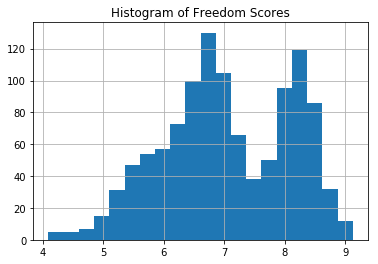

In [8]:
hfi_df.free_score.hist(bins=20)
plt.title('Histogram of Freedom Scores')
plt.show()

Most coutries feel somewhat free (175 at just below 7). These a good chunk of countries that feel very free with 125 at just above 8.

In [9]:
# wo_corr.where(wo_corr>0.4)
# hfi_df.where(hfi_df['free_score'] < 6)

freest_30 = hfi_df.groupby('country')['free_score'].mean().sort_values(ascending=False)[:30]
freest_30

country
Hong Kong         8.970342
New Zealand       8.857553
Switzerland       8.782947
Canada            8.619081
Australia         8.613201
Finland           8.606345
Denmark           8.589246
Norway            8.527672
United Kingdom    8.513016
Luxembourg        8.494836
Ireland           8.477890
Sweden            8.445823
Austria           8.424141
Netherlands       8.423338
Germany           8.419142
Estonia           8.390369
Malta             8.324871
United States     8.304748
Belgium           8.227984
Czech Rep.        8.209978
Lithuania         8.180404
Japan             8.179346
Portugal          8.165574
Iceland           8.151914
Cyprus            8.148435
Chile             8.144992
Spain             8.141659
Taiwan            8.135682
Mauritius         8.130396
Latvia            8.124512
Name: free_score, dtype: float64

The top 25 countries are very similar in score

Text(0.5,1,'Average Yearly Women Freedom by Region')

<Figure size 432x288 with 0 Axes>

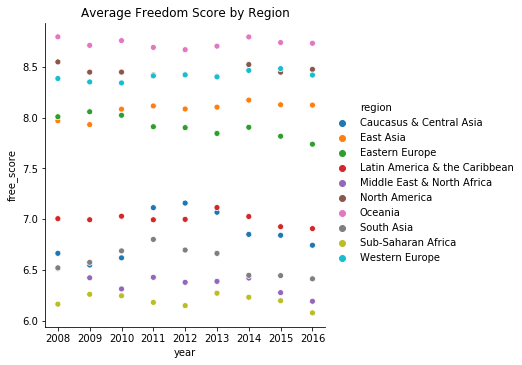

<Figure size 432x288 with 0 Axes>

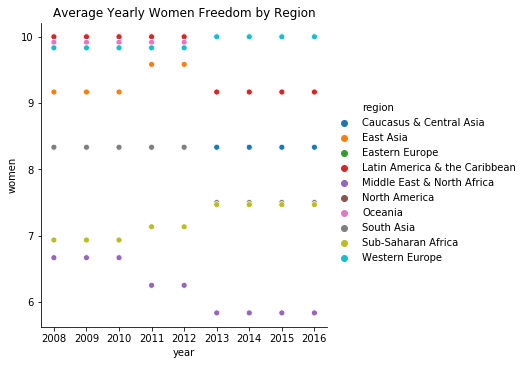

In [10]:
region_yr = hfi_df.groupby(['region', 'year']).median().reset_index()

# Plot human freedom by region
plt.figure()
sns.relplot(x='year', y='free_score', hue='region', data=region_yr)
plt.title('Average Freedom Score by Region')

#Plot women's freeodm by region
plt.figure()
sns.relplot(x='year', y='women', hue='region', data=region_yr)
plt.title('Average Yearly Women Freedom by Region')

In [11]:
# Make the correlation matrix.
corrmat = hfi_df.corr()
print(corrmat)

                     year  rule_of_law  homicide  disappearances  \
year             1.000000    -0.092408  0.046588       -0.089490   
rule_of_law     -0.092408     1.000000  0.459227        0.526535   
homicide         0.046588     0.459227  1.000000        0.195905   
disappearances  -0.089490     0.526535  0.195905        1.000000   
security_safety -0.041645     0.708387  0.706307        0.701640   
movement        -0.034917     0.454471 -0.036796        0.462791   
religion        -0.133381     0.213433 -0.180636        0.208388   
association     -0.034112     0.439177 -0.004026        0.283588   
expression      -0.053108     0.554002  0.099916        0.468377   
identity        -0.021402     0.398075 -0.037675        0.384759   
government      -0.004534    -0.344867 -0.274919       -0.132295   
legal           -0.039058     0.892363  0.460924        0.488798   
money_access     0.098365     0.602852  0.249594        0.396439   
trade            0.001946     0.680144  0.272951

In [12]:
hfi_df['women'].mean()

8.38839100852884

In [13]:
# make women's score into a binary column
# if 1 rating is good, if 0 rating is bad
hfi_df['women'] = np.where(hfi_df['women'] >= 8.3, 1, 0)
hfi_df.women.value_counts()

1    726
0    401
Name: women, dtype: int64

Text(0.5,1,'0: Opressed Women || 1: Free Women')

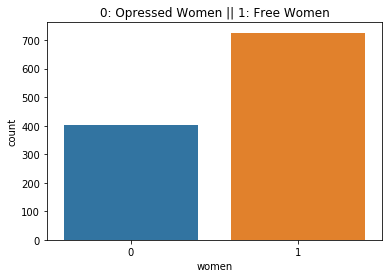

In [14]:
sns.countplot('women', data=hfi_df)
plt.title('0: Opressed Women || 1: Free Women')

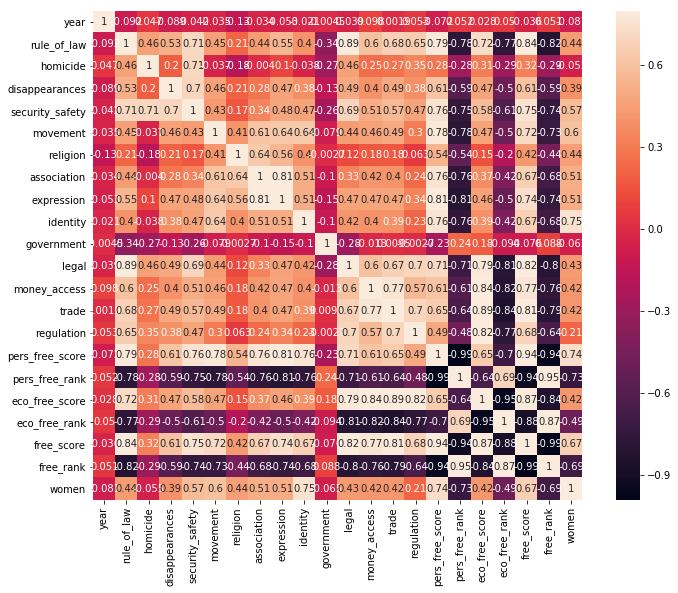

In [15]:
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, annot=True, vmax=.8, square=True)
plt.show()

In [16]:
hfi_df.corr()['women'].abs().sort_values(ascending=False)

women              1.000000
identity           0.704169
pers_free_rank     0.681014
pers_free_score    0.678071
free_rank          0.661682
free_score         0.645899
movement           0.608972
security_safety    0.500479
eco_free_rank      0.490983
money_access       0.467341
trade              0.463255
eco_free_score     0.454922
rule_of_law        0.437560
expression         0.436399
association        0.430313
legal              0.426392
disappearances     0.381599
religion           0.362164
regulation         0.258241
homicide           0.058536
government         0.055397
year               0.023282
Name: women, dtype: float64

In [17]:
hfi_df.isnull().sum()

year               0
country            0
region             0
rule_of_law        0
homicide           0
disappearances     0
security_safety    0
movement           0
religion           0
association        0
expression         0
identity           0
government         0
legal              0
money_access       0
trade              0
regulation         0
pers_free_score    0
pers_free_rank     0
eco_free_score     0
eco_free_rank      0
free_score         0
free_rank          0
women              0
dtype: int64

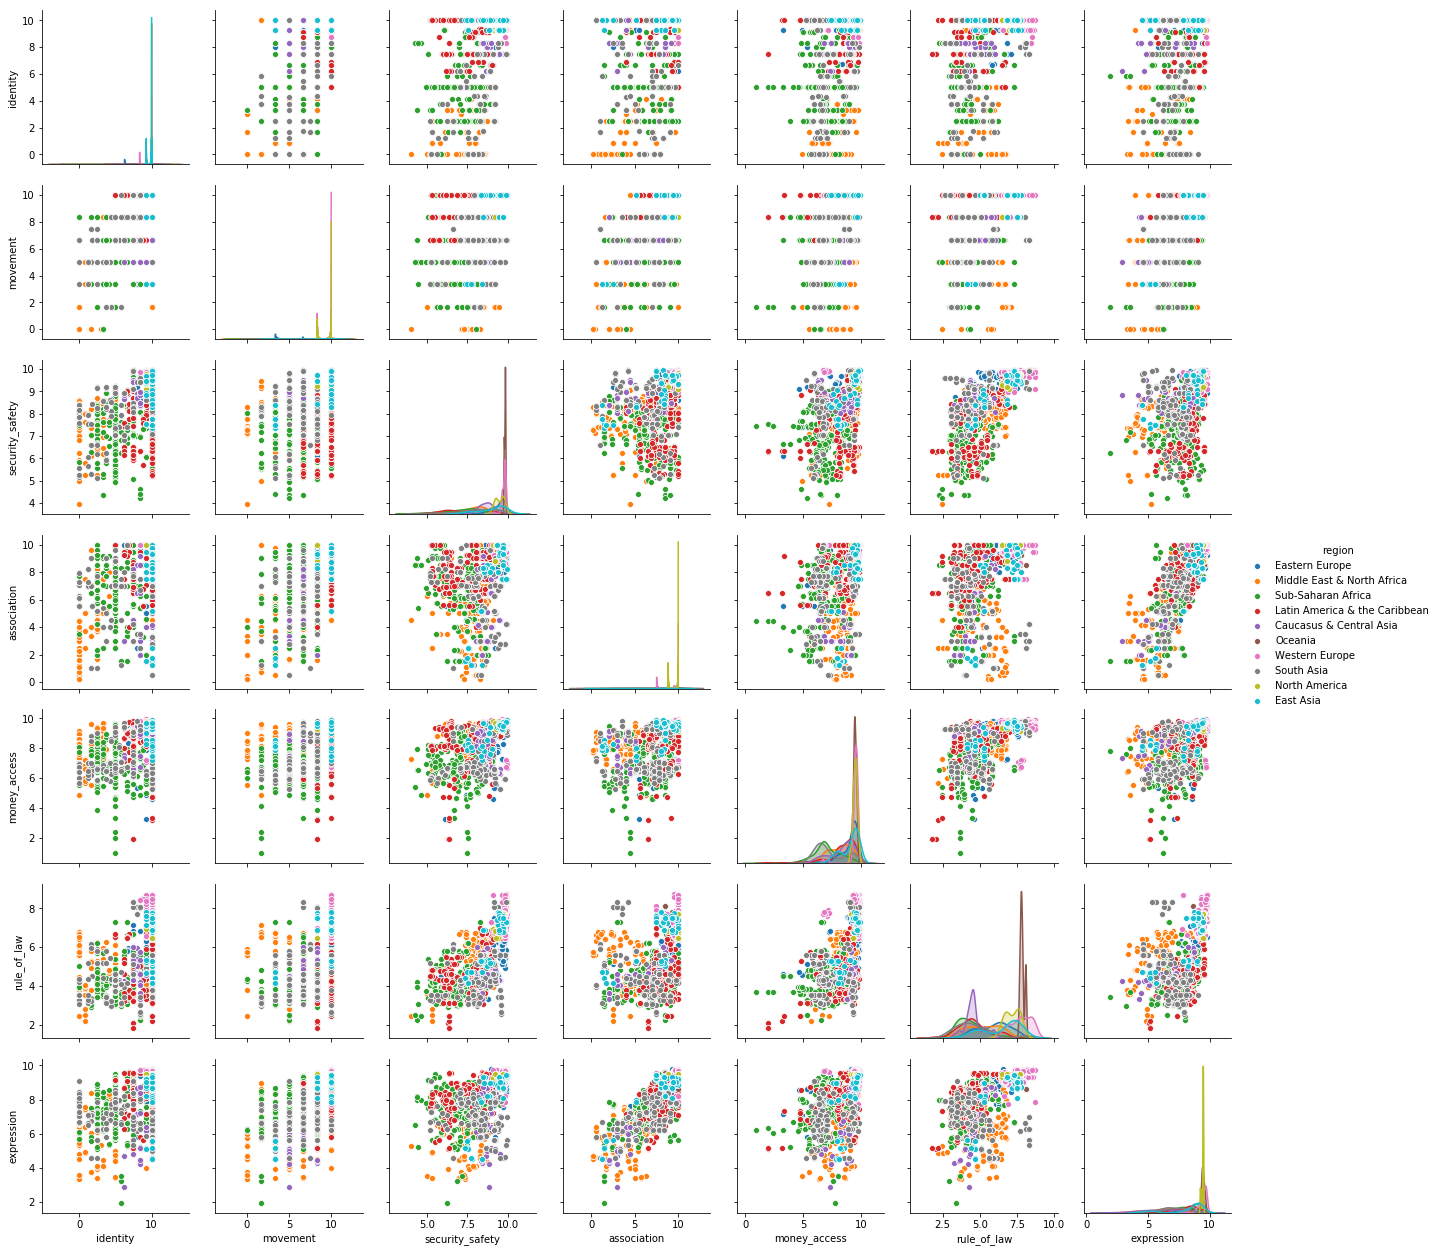

In [18]:
wmn_df = hfi_df[['identity', 'movement', 'security_safety', 'association', 
                 'money_access', 'rule_of_law', 'expression', 'region']]
pp = sns.pairplot(data=wmn_df, hue='region')

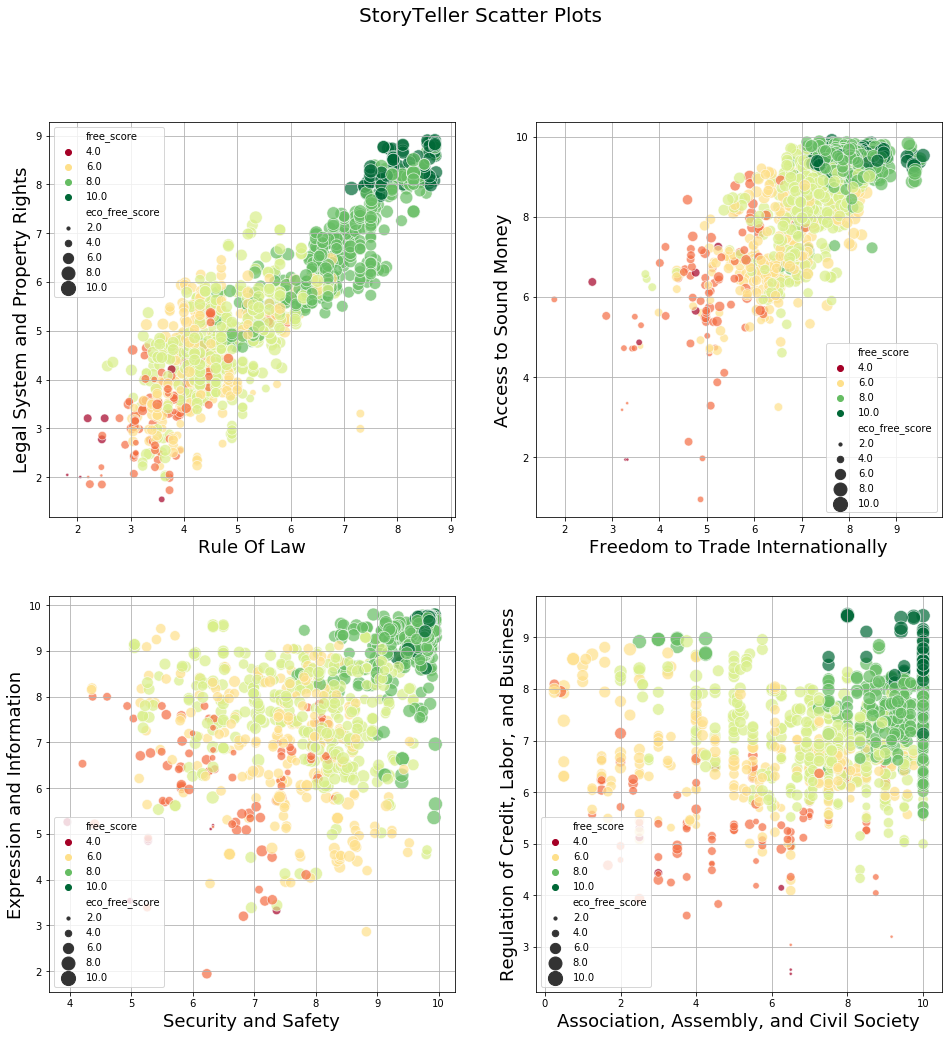

In [19]:
freedom_class = hfi_df.free_score.round(decimals=0)
economy_class = hfi_df.eco_free_score.round(decimals=0)

plt.figure(figsize=(16,16))

plt.suptitle("StoryTeller Scatter Plots",fontsize=20)

plt.subplot(221)
sns.scatterplot(data=hfi_df,x="rule_of_law",y="legal",hue=freedom_class, palette="RdYlGn",alpha=0.7,size=economy_class, sizes=(10,200))
plt.xlabel("Rule Of Law", fontsize=18)
plt.ylabel("Legal System and Property Rights", fontsize=18)
plt.grid()

plt.subplot(222)
sns.scatterplot(data=hfi_df,x="trade",y="money_access",hue=freedom_class, palette="RdYlGn",alpha=0.7,size=economy_class, sizes=(10,200))
plt.xlabel("Freedom to Trade Internationally", fontsize=18)
plt.ylabel("Access to Sound Money", fontsize=18)
plt.grid()

plt.subplot(223)
sns.scatterplot(data=hfi_df,x="security_safety",y="expression",hue=freedom_class, palette="RdYlGn",alpha=0.7,size=economy_class, sizes=(10,200))
plt.xlabel("Security and Safety", fontsize=18)
plt.ylabel("Expression and Information", fontsize=18)
plt.grid()

plt.subplot(224)
sns.scatterplot(data=hfi_df,x="association",y="regulation",hue=freedom_class, palette="RdYlGn",alpha=0.7,size=economy_class, sizes=(10,200))
plt.xlabel("Association, Assembly, and Civil Society", fontsize=18)
plt.ylabel("Regulation of Credit, Labor, and Business", fontsize=18)
plt.grid()

plt.show()

Size of the each scatter is equals to size Economical Freedom Score. <br>
Color of the each scatter is defined by their Human Freedom Score. <br>

In terms of people's freedom and their economical freedom, there seems to be positive correlation between country's legal systems and rule of law as well as international relations and people's access to money/jobs.

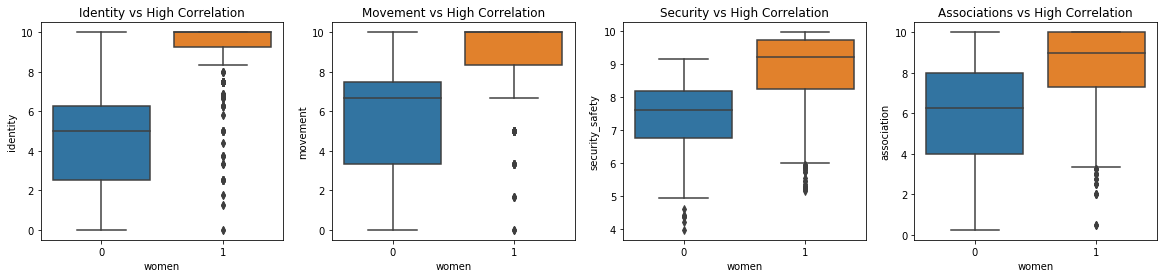

In [20]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# High Correlations with our Class (Women)
sns.boxplot(x="women", y="identity", data=hfi_df, ax=axes[0])
axes[0].set_title('Identity vs High Correlation')

sns.boxplot(x="women", y="movement", data=hfi_df, ax=axes[1])
axes[1].set_title('Movement vs High Correlation')


sns.boxplot(x="women", y="security_safety", data=hfi_df, ax=axes[2])
axes[2].set_title('Security vs High Correlation')


sns.boxplot(x="women", y="association", data=hfi_df, ax=axes[3])
axes[3].set_title('Associations vs High Correlation')

plt.show()

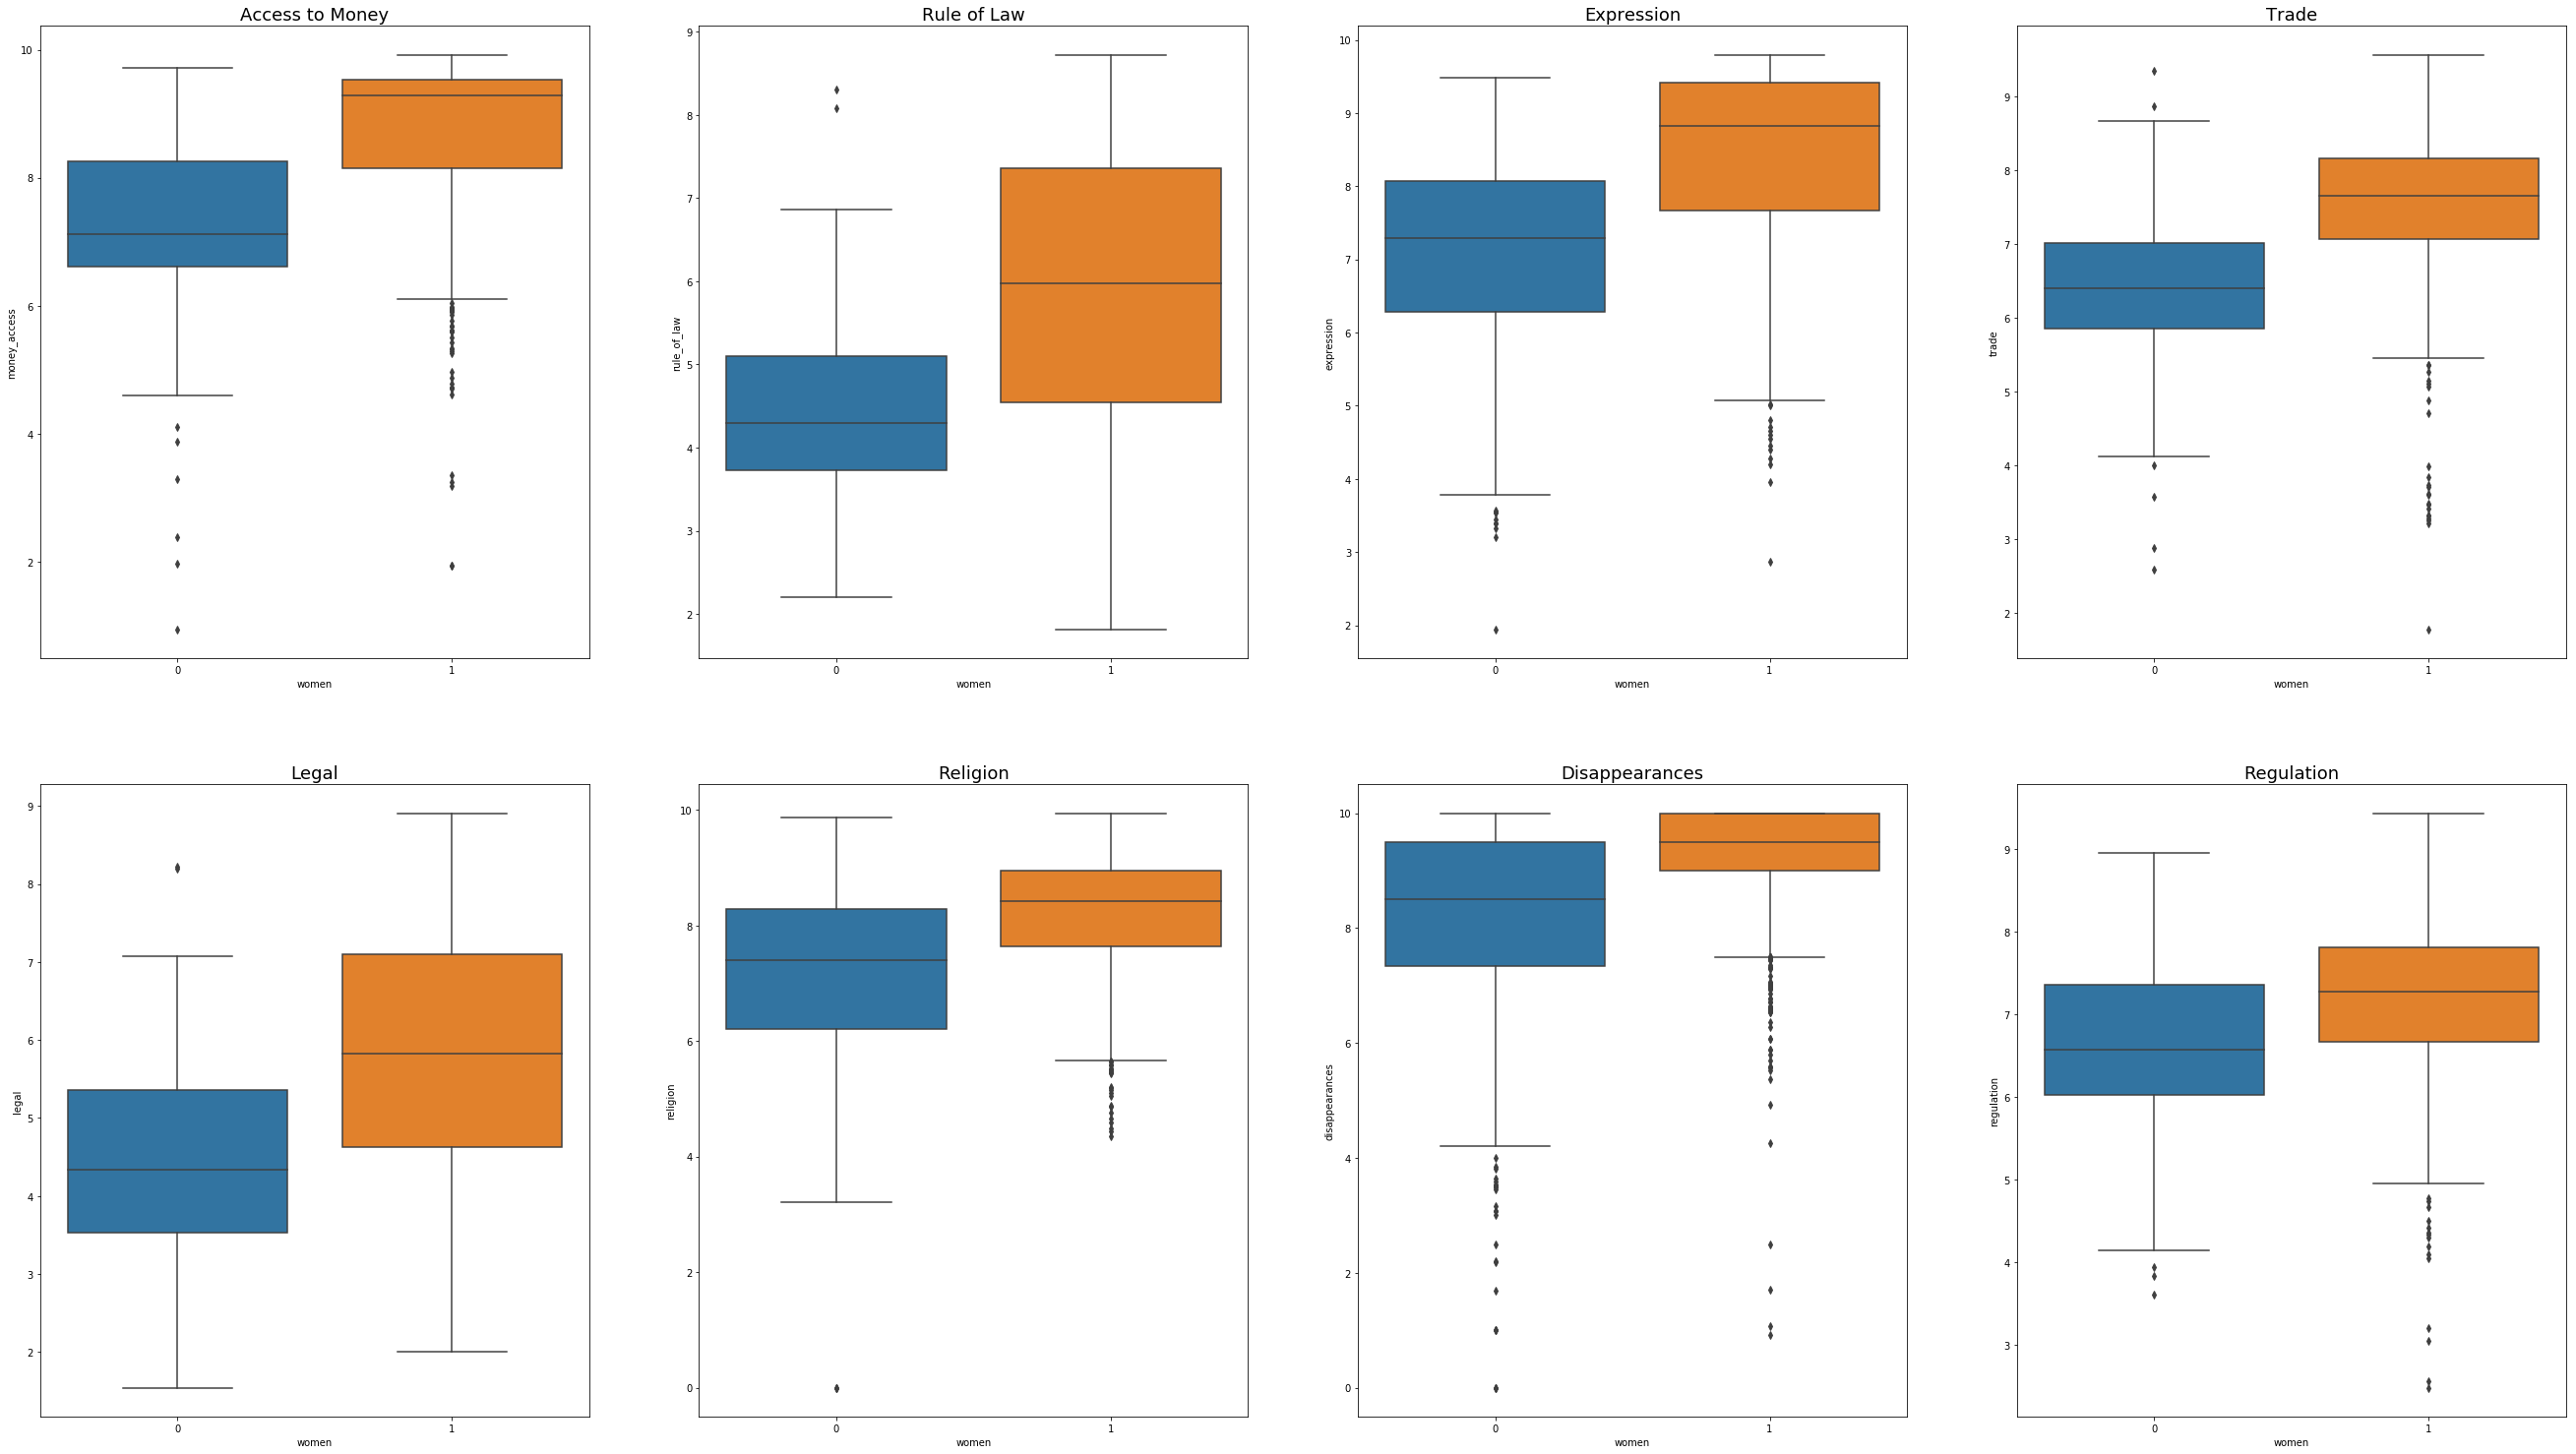

In [21]:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(46,26))

# High Correlations with our Class (Women)
sns.boxplot(x="women", y="money_access", data=hfi_df, ax=axes[0,0])
axes[0,0].set_title('Access to Money', fontsize= 18)

sns.boxplot(x="women", y="rule_of_law", data=hfi_df, ax=axes[0,1])
axes[0,1].set_title('Rule of Law', fontsize=18)

sns.boxplot(x="women", y="expression", data=hfi_df, ax=axes[0,2])
axes[0,2].set_title('Expression', fontsize=18)

sns.boxplot(x="women", y="trade", data=hfi_df, ax=axes[0,3])
axes[0,3].set_title('Trade', fontsize=18)

sns.boxplot(x="women", y="legal", data=hfi_df, ax=axes[1,0])
axes[1,0].set_title('Legal', fontsize=18)

sns.boxplot(x="women", y="religion", data=hfi_df, ax=axes[1,1])
axes[1,1].set_title('Religion', fontsize=18)


sns.boxplot(x="women", y="disappearances", data=hfi_df, ax=axes[1,2])
axes[1,2].set_title('Disappearances', fontsize=18)


sns.boxplot(x="women", y="regulation", data=hfi_df, ax=axes[1,3])
axes[1,3].set_title('Regulation', fontsize=18)

plt.tight_layout
plt.show()

In [22]:
# To help reduce noise in the training data, we'll get rid of these known outliers in
# features that are highly correlated to our target (Fraudulence)

# winsorize to remove extreme outliers from highly correlated features
import scipy.stats

hfi_df['identity_wins'] = scipy.stats.mstats.winsorize(hfi_df['identity'], limits= [0.05, 0.05])
hfi_df['movement_wins'] = scipy.stats.mstats.winsorize(hfi_df['movement'], limits= [0.05, 0.05])
hfi_df['security_safety_wins'] = scipy.stats.mstats.winsorize(hfi_df['security_safety'], limits= [0.05, 0.05])
hfi_df['association_wins'] = scipy.stats.mstats.winsorize(hfi_df['association'], limits= [0.05, 0.05])

hfi_df['money_access_wins'] = scipy.stats.mstats.winsorize(hfi_df['money_access'], limits= [0.05, 0.05])
hfi_df['expression_wins'] = scipy.stats.mstats.winsorize(hfi_df['expression'], limits= [0.05, 0.05])
hfi_df['trade_wins'] = scipy.stats.mstats.winsorize(hfi_df['trade'], limits= [0.05, 0.05])
hfi_df['religion_wins'] = scipy.stats.mstats.winsorize(hfi_df['religion'], limits= [0.05, 0.05])
hfi_df['disappearances_wins'] = scipy.stats.mstats.winsorize(hfi_df['disappearances'], limits= [0.05, 0.05])
hfi_df['regulation_wins'] = scipy.stats.mstats.winsorize(hfi_df['regulation'], limits= [0.05, 0.05])

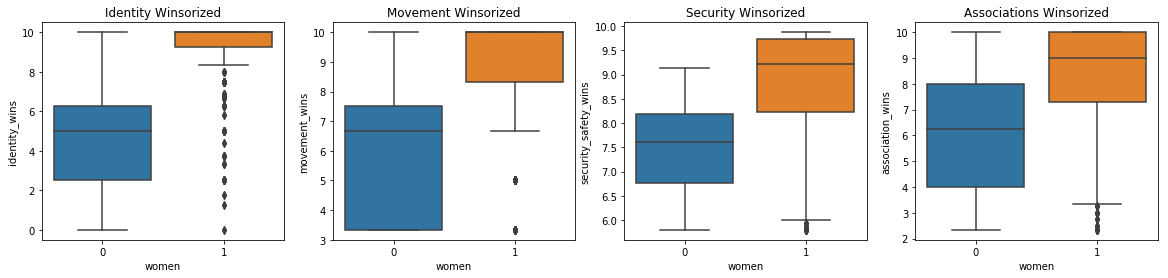

In [23]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# High Correlations with our Class (Women)
sns.boxplot(x="women", y="identity_wins", data=hfi_df, ax=axes[0])
axes[0].set_title('Identity Winsorized')

sns.boxplot(x="women", y="movement_wins", data=hfi_df, ax=axes[1])
axes[1].set_title('Movement Winsorized')


sns.boxplot(x="women", y="security_safety_wins", data=hfi_df, ax=axes[2])
axes[2].set_title('Security Winsorized')


sns.boxplot(x="women", y="association_wins", data=hfi_df, ax=axes[3])
axes[3].set_title('Associations Winsorized')

plt.show()

In [24]:
hfi_df.isnull().sum()

year                    0
country                 0
region                  0
rule_of_law             0
homicide                0
disappearances          0
security_safety         0
movement                0
religion                0
association             0
expression              0
identity                0
government              0
legal                   0
money_access            0
trade                   0
regulation              0
pers_free_score         0
pers_free_rank          0
eco_free_score          0
eco_free_rank           0
free_score              0
free_rank               0
women                   0
identity_wins           0
movement_wins           0
security_safety_wins    0
association_wins        0
money_access_wins       0
expression_wins         0
trade_wins              0
religion_wins           0
disappearances_wins     0
regulation_wins         0
dtype: int64

I'm going to run vanilla models of Logistic Regression, SVM and KNN through grid search . Then I'll run XGBoost.

In [25]:
# Features and Target data
X = hfi_df.drop(['women', 'year', 'country', 'region'], axis=1)
y = hfi_df['women']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# I'll be using GridSearchCV to find the best classfier so I'll turn 
# the values into an array to feed into the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [27]:
# Implementing vanilla classifiers
#LogisiticRegression == LogR
#KNearest == KNN
#Support Vector Classifier == SVC
#DecisionTreeClassifier == DTC
classifiers = {
    "LogR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC()
}

Classifiers:  LogisticRegression Has a 97.0 % training accuracy score
Classifiers:  KNeighborsClassifier Has a 87.0 % training accuracy score
Classifiers:  SVC Has a 87.0 % training accuracy score


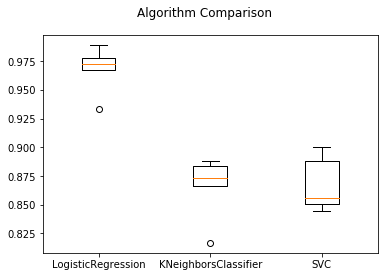

In [28]:
results = []
names = []

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    results.append(training_score)
    names.append(classifier.__class__.__name__)
    print("Classifiers: ", classifier.__class__.__name__, "Has a", 
          round(training_score.mean(), 2) * 100, "% training accuracy score")
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Logistic Regression has clearly outperformed the other two classifiers. However, by eyeballing it seems that SVC had the least variance.

In [29]:
# Use Grid Search to find the best parameters for each model

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# GS logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": [2,3,4,5,7], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best parameters
knn = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 
              'gamma':[0.001, 0.01, 0.1, 1, 10]}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best parameters
svc = grid_svc.best_estimator_


print(log_reg, '\n LR best Score ', grid_log_reg.best_score_)
print(knn, '\n KNN best Score ', grid_knears.best_score_)
print(svc, '\n SVC best Score ', grid_svc.best_score_)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) 
 LR best Score  0.9833518312985572
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform') 
 KNN best Score  0.8657047724750278
SVC(C=0.9, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 
 SVC best Score  0.9800221975582686


No longer running vanilla! By selecting better parameters for each model, I've improved the results of all three with logistic regression still performing the best, but SVC is a very close second. I'm going to look at the precision and accuracy now.

In [31]:
from sklearn.metrics import confusion_matrix

lr_pred = grid_log_reg.predict(X_test)
# Compute confusion matrix
labels = [0,1]
lr_cnf_matrix = confusion_matrix(y_test,lr_pred,labels)
np.set_printoptions(precision=2)

print(lr_cnf_matrix)

[[ 78   1]
 [  0 147]]
